In [45]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import aesara_theano_fallback.tensor as tt
import arviz as az

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

ModuleNotFoundError: No module named 'aesara_theano_fallback'

In [2]:
def plot_cont(self, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    samples = self.random(size=1000)
    x = np.linspace(np.min(samples), np.max(samples), 1000)
    ax.plot(x, np.exp(self.logp(x)).eval())
    return ax

# Assign this distribution to the abstract class Continuous
pm.Continuous.plot = plot_cont

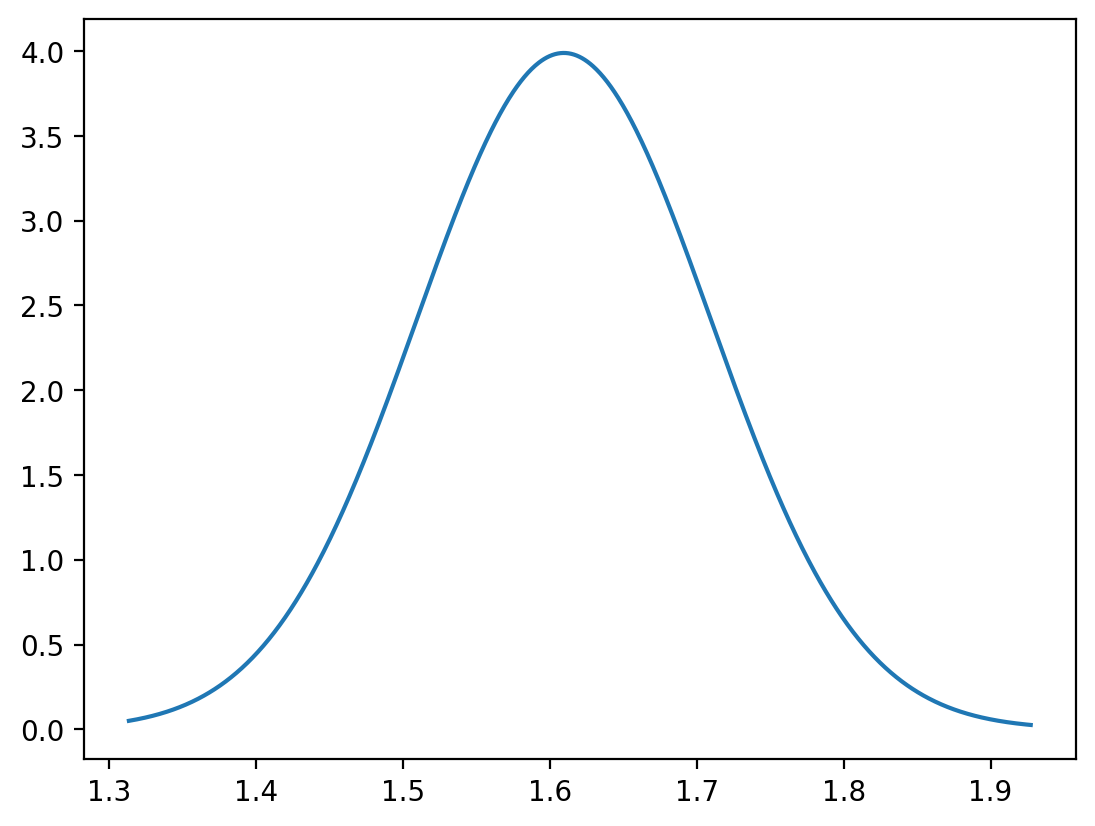

In [10]:

wax = pm.Normal.dist(mu=np.log(5), sd=0.1).plot()
#ax.set_xlim(-5,1)

In [79]:
with pm.Model() as model:
    log_ror = pm.Normal("log_ror", mu=np.log(5), sigma=0.1)
    log_ror2 = pm.LogNormal("log_ror2", mu=np.log(2000), sigma=0.1)
    ror = pm.Deterministic("ror", pm.math.exp(log_ror))

In [80]:
with model:
    trace = pm.sample(
        tune=500, #2500,
        draws=3000, #2000,
        cores=1, #4
        chains=1, #4
        return_inferencedata=True,)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [log_ror, log_ror2]


/home/juan/anaconda3/envs/exoplanet2/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 1 chain for 500 tune and 3_000 draw iterations (500 + 3_000 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([<Axes: title={'center': 'log_ror'}>,
       <Axes: title={'center': 'ror'}>,
       <Axes: title={'center': 'log_ror2'}>], dtype=object)

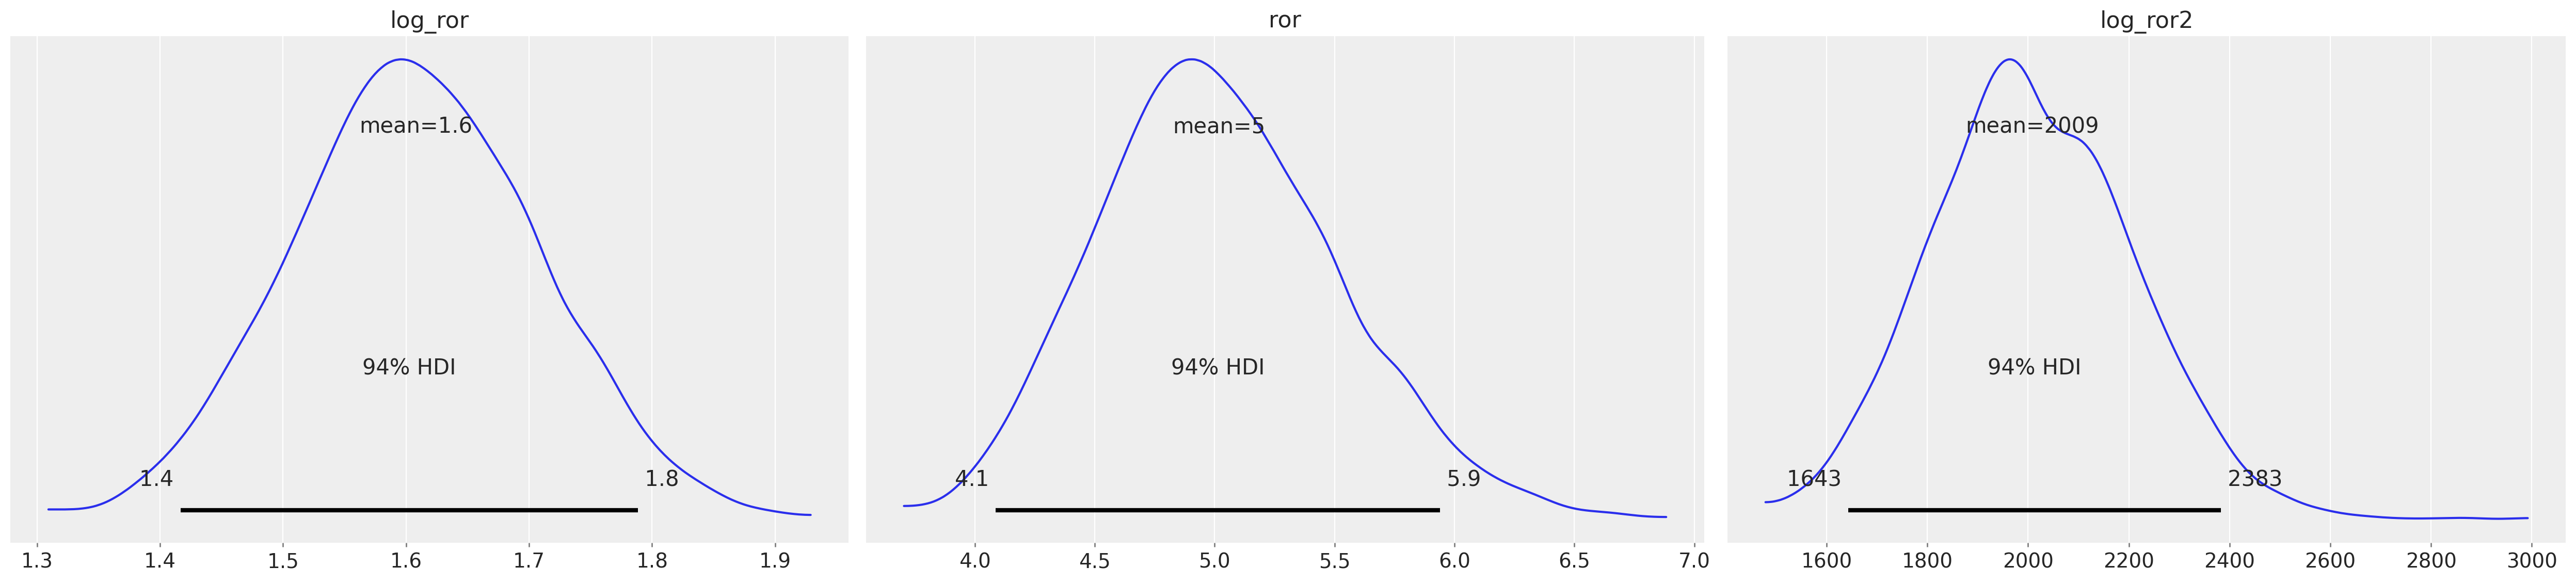

In [81]:
az.plot_posterior(trace, var_names=['log_ror', 'ror','log_ror2'])